In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [2]:
(x_train,y_train),(x_test,y_test)= keras.datasets.mnist.load_data()

In [3]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

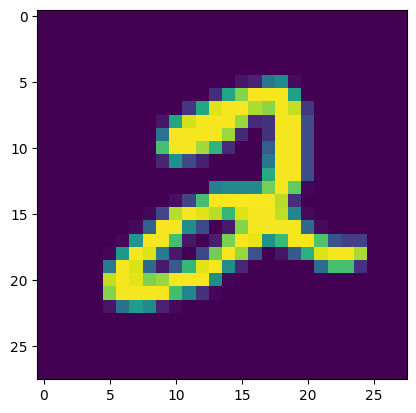

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5])

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
x_train[0:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [9]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation = 'relu'))
Dropout(0.2)
model.add(Dense(64, activation = 'relu'))
Dropout(0.2)
model.add(Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], optimizer = 'Adam')

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [14]:
history = model.fit(x_train, y_train, epochs = 100, validation_split = 0.3, callbacks = [early_stopping])

Epoch 1/100
1313/1313 [==============================] - 15s 6ms/step - loss: 0.2820 - accuracy: 0.9188 - val_loss: 0.1700 - val_accuracy: 0.9494
Epoch 2/100
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1151 - accuracy: 0.9655 - val_loss: 0.1168 - val_accuracy: 0.9643
Epoch 3/100
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0760 - accuracy: 0.9766 - val_loss: 0.1029 - val_accuracy: 0.9705
Epoch 4/100
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0584 - accuracy: 0.9816 - val_loss: 0.1031 - val_accuracy: 0.9697
Epoch 5/100
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0438 - accuracy: 0.9860 - val_loss: 0.1146 - val_accuracy: 0.9701
Epoch 6/100
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0357 - accuracy: 0.9885 - val_loss: 0.1147 - val_accuracy: 0.9691
Epoch 7/100
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0285 - accuracy: 0.9904 - val_loss: 0.1117 - val_a

In [16]:
y_ = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [17]:
y_

array([[7.26999770e-06, 4.10796190e-07, 1.30829954e-04, ...,
        9.97845173e-01, 3.12129305e-06, 1.22454920e-04],
       [5.44664793e-08, 3.46087239e-04, 9.95633066e-01, ...,
        1.69939707e-09, 2.02081424e-06, 8.49809112e-12],
       [1.87066087e-06, 9.98703599e-01, 2.35777668e-04, ...,
        3.98905366e-04, 1.25891820e-04, 1.63046770e-05],
       ...,
       [1.05964869e-10, 1.10252415e-07, 5.77745518e-10, ...,
        2.68404415e-06, 1.39808571e-06, 2.42547621e-03],
       [7.34717176e-09, 1.18331867e-09, 1.32353378e-07, ...,
        1.38982745e-08, 7.05169487e-06, 1.44238499e-09],
       [3.41044988e-08, 9.74775483e-10, 3.43182016e-08, ...,
        1.92923000e-12, 2.69736177e-07, 4.69281940e-11]], dtype=float32)

In [18]:
y_pred = y_.argmax(axis = 1)

In [19]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
print(accuracy_score(y_test, y_pred))

0.9712


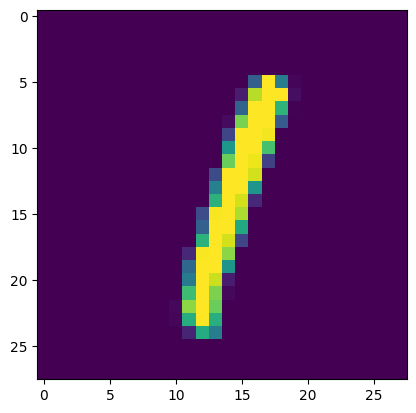

In [22]:
plt.imshow(x_test[5])

In [26]:
model.predict(x_test[5].reshape(1,28,28)).argmax(axis = 1)

1/1 [==============================] - 0s 33ms/step


array([1])

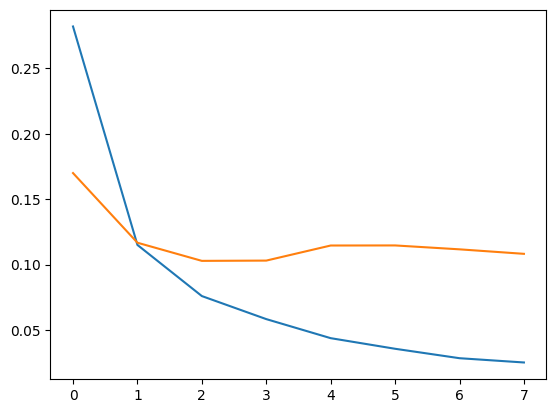

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

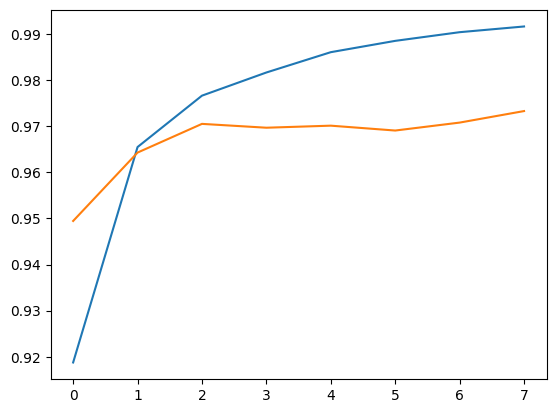

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])